# Plot spatial data for 20CR

In [1]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import dask.diagnostics # dask allows you to check how long something is taking to load
import climtas # needed to count event statistics with a specified duration

In [2]:
# import custom functions
import sys 
# sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook
sys.path.append('/g/data/w48/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR

# 20CR data

## area weighting???

In [6]:
# define path where netcdsf of temperature are stored
path = '/g/data/w48/kb6999/Reanalysis/20CR_PRATE_data_for_plots/'

In [7]:
# open lat lon mean of temperature 
mmm_mon_Glob = xr.open_dataset(f'{path}mmm_anom_glob.nc')

In [8]:
# select out dates around kraktoa eruption 
K_mmm_mon_Glob_r = mmm_mon_Glob.sel(time = slice('1880','1990'))

In [9]:
# reverse the latitude axis so it goes from -90 to 90
K_mmm_mon_Glob = K_mmm_mon_Glob_r.reindex(lat=list(reversed(K_mmm_mon_Glob_r.lat)))

In [14]:
# import landmask dataset 
landfrac_ds = xr.open_dataset('/g/data/w48/kb6999/Reanalysis/20CR_data_netcdfs/land_pr_20CR.nc')
landmask = landfrac_ds

In [15]:
# Select out SH and NH anomalies 
K_mmm_mon_SH = K_mmm_mon_Glob.sel(lat=slice(0,-90)) 
K_mmm_mon_NH = K_mmm_mon_Glob.sel(lat=slice(90,0)) 
# select out the Australian and E Australian anomalies 
K_mmm_mon_Aus = K_mmm_mon_Glob.sel(lat=slice(-50,-10), lon=slice(110,160)).where(landmask.LAND==1.0, drop=True)
K_mmm_mon_EA = K_mmm_mon_Glob.sel(lat=slice(-50,-5), lon=slice(140,155)).where(landmask.LAND==1.0, drop=True)

In [16]:
K_mmm_mon_Aus

<xarray.Dataset>
Dimensions:  (lat: 44, lon: 57, time: 1332)
Coordinates:
  * lat      (lat) float64 -43.16 -42.46 -41.75 -41.05 ... -12.28 -11.58 -10.18
  * lon      (lon) float64 113.9 114.6 115.3 116.0 ... 151.2 151.9 152.6 153.3
  * time     (time) datetime64[ns] 1880-01-31 1880-02-29 ... 1990-12-31
    month    (time) int64 ...
Data variables:
    pr       (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

## Figures

In [17]:
# set the default font size
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [18]:
# eruption dates
e_date = ['1883-08','1902-10', '1963-03', '1982-04', '1991-06']
e_post6mon = ['1884-02', '1903-04', '1963-09', '1982-10', '1991-12']
e_post12mon = ['1884-08','1903-10', '1964-03', '1983-04', '1992-06']
e_post24mon = ['1885-08','1904-10', '1965-03', '1984-04', '1993-06']

In [19]:
# dates and title for eruption and 3 times after
K_dates = [e_date[0], e_post6mon[0], e_post12mon[0], e_post24mon[0]]
title_label = ['Eruption month, ', '6 months post-eruption, ', '12 months post-eruption, ', '24 months post-eruption, ']

In [20]:
titles=[]
for i,vals in enumerate(K_dates):
    t = title_label[i] + K_dates[i]
    titles.append(t)
titles

['Eruption month, 1883-08',
 '6 months post-eruption, 1884-02',
 '12 months post-eruption, 1884-08',
 '24 months post-eruption, 1885-08']

In [21]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

In [22]:
# set the mod max for the colour bars
cmax_tmp = [-2,2]
cmax_pr = [-2,2]

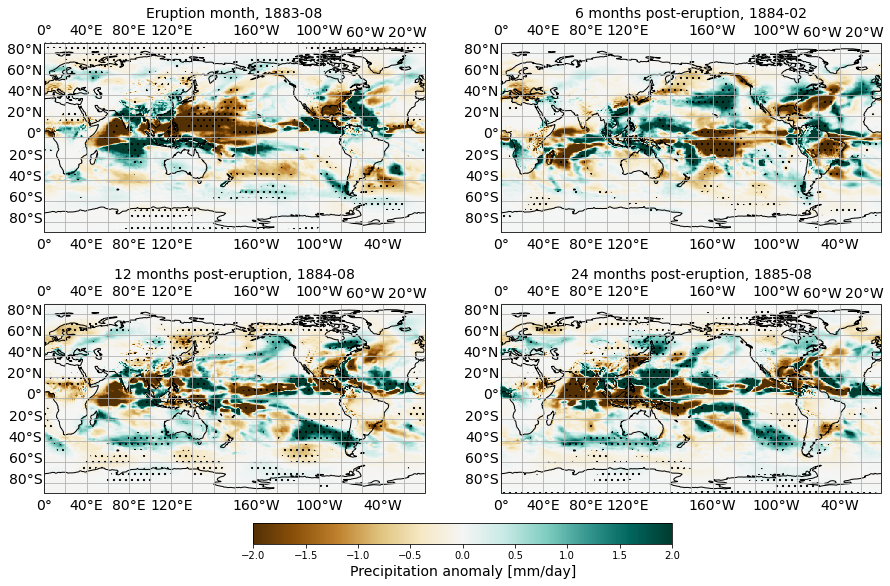

In [23]:
# plot of global monthly member mean temperature at 4 discrete time periods (not averaged)
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Glob.pr, cmax_pr, K_dates, titles, 'BrBG', f'Precipitation anomaly [mm/day]', 1)

fig.set_figwidth(15)
fig.set_figheight(11) # these two parameters change the figure height and width 

# for a, ax in enumerate(axs):
#     # set ylabels 
#     axs[a].set_yticks(axs[a].get_yticks())
#     axs[a].set_yticklabels(axs[a].get_yticklabels())
#     axs[a].set_ylabel(None)
    
#     # set xlabels 
#     axs[a].set_xticks(axs[a].get_xticks())
#     axs[a].set_xticklabels(axs[a].get_xticklabels())
#     axs[a].set_xlabel(None)

plt.savefig('R_spatial_pr_Glob.png', dpi=300 , bbox_inches='tight') # bbox=tight removes lat labels when figure saves

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


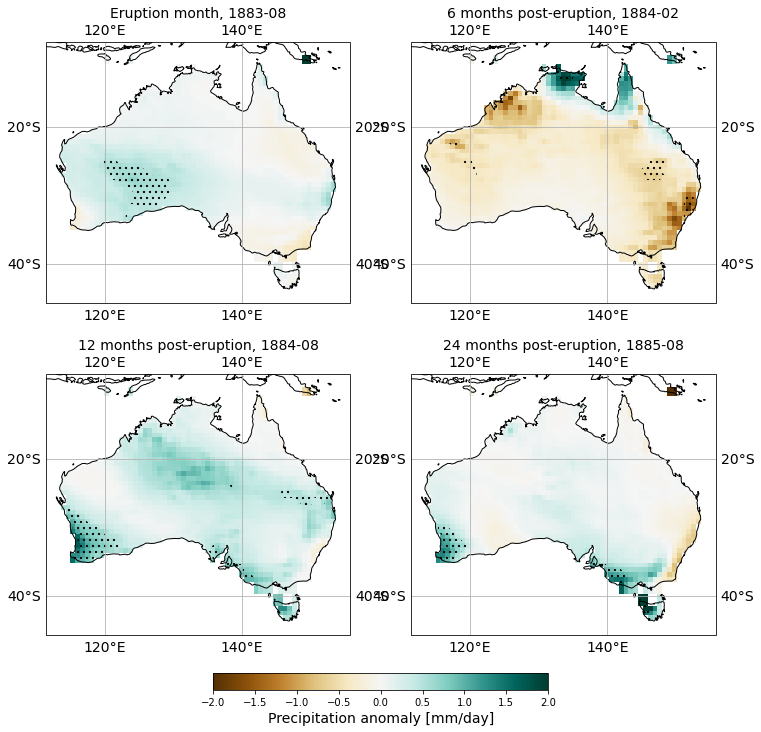

In [24]:
# plot of Aus monthly member mean temperature
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Aus.pr, cmax_pr, K_dates, titles, 'BrBG', f'Precipitation anomaly [mm/day]', 1)

fig.set_figwidth(12)
fig.set_figheight(14) # these two parameters change the figure height and width 

plt.savefig('R_spatial_pr_Aus.png', dpi=300, bbox_inches='tight')

In [ ]:
# # plot of global monthly member mean precipitation
# fig = fplot.spatial_plot(2, 2, K_mmm_mon_Glob.pr, cmax_pr, K_dates, titles, 'BrBG','Precipitation anomaly [mm/day]', 1)

# fig.set_figwidth(15)
# fig.set_figheight(11) # these two parameters change the figure height and width 

# plt.savefig('R_spatial_pr_Glob.png', dpi=300)#, bbox_inches='tight')

In [ ]:
# # plot of Aus monthly member mean precipitation
# fig = fplot.spatial_plot(2, 2, K_mmm_mon_Aus.pr, cmax_pr, K_dates, titles, 'BrBG','Precipitation anomaly [mm/day]', 1)

# fig.set_figwidth(12)
# fig.set_figheight(14) # these two parameters change the figure height and width 

# plt.savefig('R_spatial_pr_Aus.png', dpi=300, bbox_inches='tight')